In [77]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
from sklearn import preprocessing as pp
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc,recall_score,precision_score,ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

import pickle

In [68]:
ds = pd.read_csv('../data/mushrooms.csv')
# remove columns based on feature importance model analysis
ds.drop(columns=['cap-shape','cap-color','veil-type','veil-color','ring-type','spore-print-color'],inplace=True)
dat = ds.values
print(dat.shape)

headers = list(ds.columns.values) #store features of mushrooms

header_dict = dict()

for x in headers:
    header_dict[x] =dict()

header_dict.pop('class')
ds.head(11)

(8124, 17)


,class,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,population,habitat
0,p,s,t,p,f,c,n,k,e,e,s,s,w,w,o,s,u
1,e,s,t,a,f,c,b,k,e,c,s,s,w,w,o,n,g
2,e,s,t,l,f,c,b,n,e,c,s,s,w,w,o,n,m
3,p,y,t,p,f,c,n,n,e,e,s,s,w,w,o,s,u
4,e,s,f,n,f,w,b,k,t,e,s,s,w,w,o,a,g
5,e,y,t,a,f,c,b,n,e,c,s,s,w,w,o,n,g
6,e,s,t,a,f,c,b,g,e,c,s,s,w,w,o,n,m
7,e,y,t,l,f,c,b,n,e,c,s,s,w,w,o,s,m
8,p,y,t,p,f,c,n,p,e,e,s,s,w,w,o,v,g
9,e,s,t,a,f,c,b,g,e,c,s,s,w,w,o,s,m


In [69]:
#IGNORE THIS CELL

arr = np.array([1,2,3])
b = np.array([4, 5, 6])

arr = np.vstack((arr, b))
#q = np.concatenate((arr,b), axis=0)
#print arr

le = pp.LabelEncoder()
le.fit(dat[:, 0])
y = le.transform(dat[:, 0])
le1 = pp.LabelEncoder()
le1.fit(dat[:, 1])
z = le1.transform(dat[:, 1])
le2 = pp.LabelEncoder()
le2.fit(dat[:, 2])
zz = le2.transform(dat[:, 2])

# y = np.vstack(y, z)
# z = np.vstack(z)
# y = np.vstack(y)
qqw = np.vstack((y, z))
qqw = np.vstack((qqw, zz))
#print qqw.T

In [70]:
#Data Preprocessing
l = pp.LabelEncoder()
l.fit(dat[:, 0])
dataa = l.transform(dat[:, 0])

cat_list = []

for ix in range(1, dat.shape[1]):
    le = pp.LabelEncoder()
    le.fit(dat[:, ix])
    y = le.transform(dat[:, ix])
    dataa = np.vstack((dataa , y))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    le_name_copy = le_name_mapping.copy()
    cat_list.append(le_name_copy)

i=0
for x in header_dict:
    header_dict[x].update(cat_list[i])
    i +=1
    
data = dataa.T


for x in header_dict:
    print(x,":",header_dict[x])


cap-surface : {'f': 0, 'g': 1, 's': 2, 'y': 3}
bruises : {'f': 0, 't': 1}
odor : {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
gill-attachment : {'a': 0, 'f': 1}
gill-spacing : {'c': 0, 'w': 1}
gill-size : {'b': 0, 'n': 1}
gill-color : {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
stalk-shape : {'e': 0, 't': 1}
stalk-root : {'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
stalk-surface-above-ring : {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-surface-below-ring : {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-color-above-ring : {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
stalk-color-below-ring : {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
ring-number : {'n': 0, 'o': 1, 't': 2}
population : {'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5}
habitat : {'d': 0, 'g': 1, 'l': 2, 'm': 3, 'p': 4, 'u': 5, 'w': 6}


In [71]:
split = int(0.80 * data.shape[0])

x_train = data[:split , 1:]
y_train = data[:split, 0]

x_test = data[split: , 1:]
y_test = data[split: , 0]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6499, 16) (6499,)
(1625, 16) (1625,)


In [78]:
est = [] #taking variable estimators
acc = []
ans = []
for iy in range(2, 200, 20):
    est.append(iy)

    
rf = RFC(n_estimators=142, n_jobs=2)
print("No. of Decision Trees : ", 142)

start = datetime.datetime.now()
rf.fit(x_train, y_train)
end = datetime.datetime.now()

print("Training Time : ", end-start)

start = datetime.datetime.now()
score = rf.score(x_test, y_test)
end = datetime.datetime.now()

print("Testing Time : ", end-start)

print("Accuracy : ", score*100 )
acc.append(score*100)
tem = rf.feature_importances_
ans.append(tem)

No. of Decision Trees :  142
Training Time :  0:00:00.364338
Testing Time :  0:00:00.102196
Accuracy :  99.01538461538462


In [79]:
def evaluate(model,x_test,y_test):
    y_pred = model.predict(x_test)
    errors = abs(y_pred -y_test)
    c_matrix = confusion_matrix(y_pred,y_test, labels= rf.classes_)
    c_disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=rf.classes_)
    print("Average Error: {:04f} degrees.".format(np.mean(errors)))
    print("Accuracy Score", accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('Recall Score = ', recall_score(y_test,y_pred))
    print('Precision Score = ', precision_score(y_test,y_pred))
    c_disp.plot()
    return type(evaluate)


Average Error: 0.009846 degrees.
Accuracy Score 0.9901538461538462
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       507
           1       0.99      1.00      0.99      1118

    accuracy                           0.99      1625
   macro avg       0.99      0.98      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Recall Score =  1.0
Precision Score =  0.9858906525573192


function

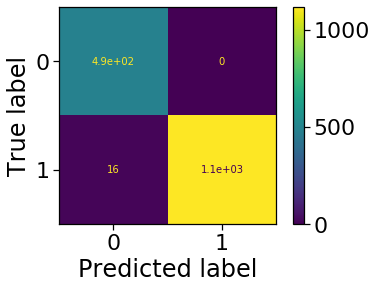

In [80]:
evaluate(rf,x_test,y_test)

In [29]:
pickle.dump(rf,open('../pickle/classification-model.pkl','wb'))